# Strings extractor

Let's write the code that would be able to extract strings of characters from an image in order to use the extracted strings as input for a neural network that would be able to recognize the characters.

To perform this task, we are going to follow these steps:

- load the image as a grayscale image
- binarize it
- invert the colors
- find all contours in the image
- get the contours bounding boxes
- using the bounding boxes, extract the strings of characters from the image
- get a usable script out of these steps

Binarization and colors inversion are pre processing steps that aim at normalizing the input data.

In [55]:
import cv2
from importlib.util import spec_from_file_location, module_from_spec
from PIL import Image
from IPython.display import display

In [56]:
spec = spec_from_file_location("strings_extractor", "./lib/strings_extractor.py")
module = module_from_spec(spec)
spec.loader.exec_module(module)

binarize_img = module.binarize_img
crop_img = module.crop_img
get_contoured_img = module.get_contoured_img
get_contours_bounding_boxes = module.get_contours_bounding_boxes
get_grayscale_img = module.get_grayscale_img
invert_colors = module.invert_colors
save_img = module.save_img
strings_extractor = module.strings_extractor

## Load the image as grayscale

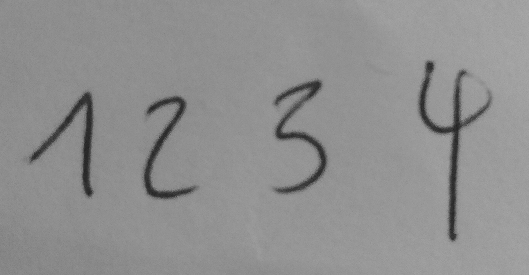

In [44]:
img_path = 'input-digits-example.png'
grayscale_img = get_grayscale_img(img_path)
display(Image.fromarray(grayscale_img))

## Binarize the image

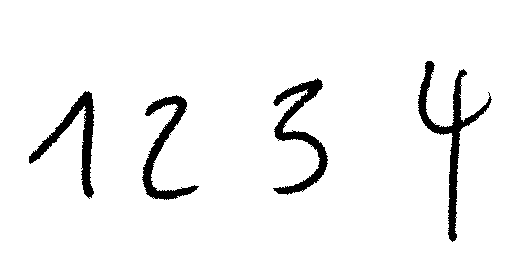

In [45]:
# apply thresholding
threshold_value = 120 # you can experiment with different values here to get the best result (very obvious to see why in the next steps)
binary_img = binarize_img(grayscale_img, threshold_value)
display(Image.fromarray(binary_img))

## Invert colors

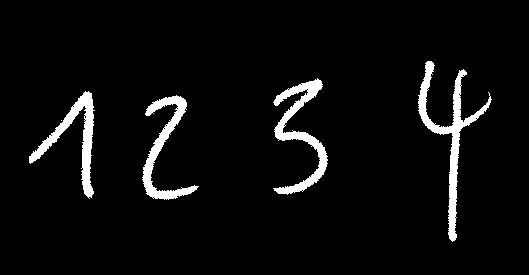

In [46]:
inverted_img = invert_colors(binary_img)
display(Image.fromarray(inverted_img))

## Get the contours of the image

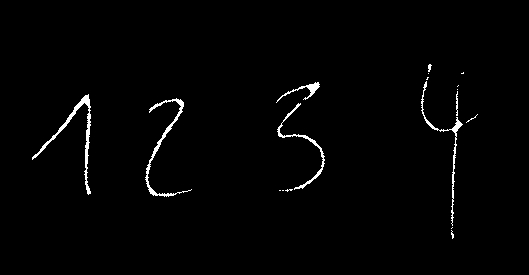

In [47]:
# we only retrieve the external contours, as these are the only ones we're interested in;
# we've also used `cv2.CHAIN_APPROX_SIMPLE` to compress the contouring, it reduces the number of data points to process
contours, to_contour_img = get_contoured_img(inverted_img)
display(Image.fromarray(to_contour_img))

In [48]:
# contours come in the form of what can become a rank-3 tensor
contours[0], contours[0].shape

(array([[[ 61, 120]]], dtype=int32), (1, 1, 2))

## Get the contours bounding boxes

In [49]:
bounding_boxes = get_contours_bounding_boxes(contours)

In [50]:
# let's show the bounding boxes on the original image 😎
for x, y, w, h in bounding_boxes:
    # draw the rectangle on the original image,
    # with a green border (using BGR format) of width 3
    cv2.rectangle(grayscale_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.imshow('bounding boxes on the original image', grayscale_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Strings extraction

In [51]:
# let's crop the images and save them to a folder
for x, y, w, h in bounding_boxes:
    cropped_img = crop_img(grayscale_img, x, y, w, h)
    save_img(cropped_img, f'./data/raw/{img_path.replace(".png", "")}-{x}-{y}-{w}-{h}.png')

## Get a usable script out of these steps

In [54]:
strings_extractor('input-digits-example.png', 120, './data/raw')

## P.S

Given the dataset your model was trained on, your pre processing steps may need to include things like resizing the image, or cropping it, or even rotating it. This is not the case here, but you may want to keep that in mind if you want to use this code for your own project.